# Using Public APIs

In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os
from dotenv import load_dotenv
import pandas as pd

load_dotenv()
pd.set_option('display.max_columns', None)

def api_runner():
    url = os.getenv('URL')
    parameters = {
      'start':'1',
      'limit':'15',
      #'limit':'25',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': os.getenv('API_KEY'),
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        with open('output.json', 'w') as f:
            json.dump(data, f, indent=4)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
    df = pd.json_normalize(data['data'])
    df['timestamp']=pd.to_datetime('now')
    df
    if not os.path.isfile('output.csv'):
        df.to_csv('output.csv', header='column_names')
    else:
        df.to_csv('output.csv', mode='a', header=False)

        


In [2]:
import os
from time import sleep,time

for i in range(333):
    api_runner()
    print('API Runner Completed Successfully')
    sleep(0.2)
exit()
# api_runner()


API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Completed Successfully
API Runner Com

KeyError: 'data'

# Transforming Data

In [3]:
df = pd.read_csv('output.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11849,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.979945e+07,1.979945e+07,False,NaN,1,NaN,NaN,NaN,2024-12-22T05:26:00.000Z,96183.612709,5.128441e+10,-46.4837,-0.582452,-1.406937,-6.098029,-2.743879,43.357862,50.760758,1.904383e+12,57.7950,2.019856e+12,NaN,2024-12-22T05:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-22 00:27:04.546723
1,1,1027,Ethereum,ETH,ethereum,9712,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.204553e+08,1.204553e+08,True,NaN,2,NaN,NaN,NaN,2024-12-22T05:26:00.000Z,3313.788191,3.126633e+10,-48.6213,-0.906492,-4.726532,-14.958048,-2.117608,26.799836,24.709903,3.991634e+11,12.1218,3.991634e+11,NaN,2024-12-22T05:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-22 00:27:04.546723
2,2,825,Tether USDt,USDT,tether,109588,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,1.398728e+11,1.434401e+11,True,NaN,3,NaN,NaN,NaN,2024-12-22T05:26:00.000Z,0.999253,1.421387e+11,-41.9306,-0.020326,-0.027455,-0.035466,-0.157683,-0.002103,-0.076709,1.397684e+11,4.2417,1.433330e+11,NaN,2024-12-22T05:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-22 00:27:04.546723
3,3,52,XRP,XRP,xrp,1485,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.725238e+10,9.998681e+10,False,NaN,4,NaN,NaN,NaN,2024-12-22T05:26:00.000Z,2.188454,1.424509e+10,-45.1770,-2.185932,-5.350521,-10.121365,57.672970,312.945320,270.081243,1.252942e+11,3.8025,2.188454e+11,NaN,2024-12-22T05:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-22 00:27:04.546723
4,4,1839,BNB,BNB,bnb,2315,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.440077e+08,1.440077e+08,False,NaN,5,NaN,NaN,NaN,2024-12-22T05:26:00.000Z,651.685277,2.075789e+09,-31.4686,-1.337123,-5.012758,-8.951213,2.657975,10.758367,9.719003,9.384770e+10,2.8481,9.384770e+10,NaN,2024-12-22T05:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-22 00:27:04.546723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,10,5805,Avalanche,AVAX,avalanche,829,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",7.157487e+08,4.098409e+08,4.481772e+08,False,NaN,11,NaN,NaN,NaN,2024-12-24T04:23:00.000Z,38.774633,7.527318e+08,36.3008,1.280562,2.452407,-20.835849,-8.492070,47.412223,39.462142,1.589143e+10,0.4802,2.775289e+10,NaN,2024-12-24T04:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 23:24:44.447447
681,11,1975,Chainlink,LINK,chainlink,1906,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",NaN,6.381000e+08,1.000000e+09,False,NaN,12,NaN,NaN,NaN,2024-12-24T04:24:00.000Z,24.107816,1.374242e+09,53.5434,0.728576,3.340496,-15.180916,34.208518,104.204860,97.595917,1.538320e+10,0.4647,2.410782e+10,NaN,2024-12-24T04:24:00.000Z,1027.0,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2024-12-23 23:24:44.447447
682,12,11419,Toncoin,TON,toncoin,644,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2.551936e+09,5.118129e+09,True,NaN,13,3.414167e+09,1.909593e+10,NaN,2024-12-24T04:23:00.000Z,5.593145,2.288487e+08,-2.4217,0.340164,1.683371,-7.870665,-13.329802,9.953023,-3.5618

In [4]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,11849,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19799453.00000,19799453.00000,False,NaN,1,NaN,NaN,NaN,2024-12-22T05:26:00.000Z,96183.61271,51284409268.55976,-46.48370,-0.58245,-1.40694,-6.09803,-2.74388,43.35786,50.76076,1904382919202.85889,57.79500,2019855866889.86011,NaN,2024-12-22T05:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-22 00:27:04.546723
1,1,1027,Ethereum,ETH,ethereum,9712,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120455304.53520,120455304.53520,True,NaN,2,NaN,NaN,NaN,2024-12-22T05:26:00.000Z,3313.78819,31266325892.90004,-48.62130,-0.90649,-4.72653,-14.95805,-2.11761,26.79984,24.70990,399163365655.67041,12.12180,399163365655.66998,NaN,2024-12-22T05:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-22 00:27:04.546723
2,2,825,Tether USDt,USDT,tether,109588,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,139872815646.75348,143440125286.86319,True,NaN,3,NaN,NaN,NaN,2024-12-22T05:26:00.000Z,0.99925,142138705035.14819,-41.93060,-0.02033,-0.02745,-0.03547,-0.15768,-0.00210,-0.07671,139768378271.49673,4.24170,143333024345.75000,NaN,2024-12-22T05:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-12-22 00:27:04.546723
3,3,52,XRP,XRP,xrp,1485,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,57252380420.00000,99986807248.00000,False,NaN,4,NaN,NaN,NaN,2024-12-22T05:26:00.000Z,2.18845,14245085478.32513,-45.17700,-2.18593,-5.35052,-10.12137,57.67297,312.94532,270.08124,125294200074.87144,3.80250,218845398489.50000,NaN,2024-12-22T05:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-22 00:27:04.546723
4,4,1839,BNB,BNB,bnb,2315,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,144007700.38000,144007700.38000,False,NaN,5,NaN,NaN,NaN,2024-12-22T05:26:00.000Z,651.68528,2075789454.65281,-31.46860,-1.33712,-5.01276,-8.95121,2.65797,10.75837,9.71900,93847698093.21732,2.84810,93847698093.22000,NaN,2024-12-22T05:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-22 00:27:04.546723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
680,10,5805,Avalanche,AVAX,avalanche,829,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.00000,409840930.07813,448177230.07813,False,NaN,11,NaN,NaN,NaN,2024-12-24T04:23:00.000Z,38.77463,752731770.77206,36.30080,1.28056,2.45241,-20.83585,-8.49207,47.41222,39.46214,15891431643.78769,0.48020,27752893884.83000,NaN,2024-12-24T04:23:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-12-23 23:24:44.447447
681,11,1975,Chainlink,LINK,chainlink,1906,2017-09-20T00:00:00.000Z,"['platform', 'defi', 'oracles', 'smart-contrac...",NaN,638099970.45279,1000000000.00000,False,NaN,12,NaN,NaN,NaN,2024-12-24T04:24:00.000Z,24.10782,1374242059.52112,53.54340,0.72858,3.34050,-15.18092,34.20852,104.20486,97.59592,15383196898.13950,0.46470,24107816346.12000,NaN,2024-12-24T04:24:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x514910771af9ca656af840dff83e8264ecf986ca,2024-12-23 23:24:44.447447
682,12,11419,Toncoin,TON,toncoin,644,2021-08-26T13:40:22.000Z,"['pos', 'layer-1', 'ftx-bankruptcy-estate', 'd...",NaN,2551936101.67336,5118129285.381

In [5]:
df3 = df.groupby('name',sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d'	,'quote.USD.percent_change_60d'	,'quote.USD.percent_change_90d']].mean()
df3


,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.00070,-1.80525,-9.72574,-3.70730,40.60697,47.83391
Ethereum,0.05101,-0.60397,-15.12609,-1.22791,32.89079,27.56681
Tether USDt,0.00374,-0.03463,-0.10637,-0.22761,-0.05571,-0.11398
XRP,-0.27349,-1.08111,-9.40766,54.64639,322.60762,276.67551
BNB,-0.48736,0.85988,-5.66342,4.08738,14.79309,12.67218
Solana,0.03605,-1.97891,-13.87303,-28.12362,9.32102,24.37998
Dogecoin,-0.58128,-2.29141,-20.86995,-25.24435,128.49092,189.69076
USDC,-0.00208,-0.00867,0.00525,0.00376,0.00114,-0.00348
Cardano,-0.32780,-2.76306,-15.98626,-10.41933,158.14502,139.22289


In [6]:
df4=df3.stack()
df4

name                                       
Bitcoin        quote.USD.percent_change_1h      0.00070
               quote.USD.percent_change_24h    -1.80525
               quote.USD.percent_change_7d     -9.72574
               quote.USD.percent_change_30d    -3.70730
               quote.USD.percent_change_60d    40.60697
                                                 ...   
NEAR Protocol  quote.USD.percent_change_24h   -10.46119
               quote.USD.percent_change_7d    -26.71223
               quote.USD.percent_change_30d   -15.93911
               quote.USD.percent_change_60d     5.36970
               quote.USD.percent_change_90d     4.12072
Length: 150, dtype: float64

In [7]:
type(df4)


pandas.core.series.Series

In [8]:
df5 = df4.to_frame(name = 'values')
df5

values
name                                                
Bitcoin       quote.USD.percent_change_1h    0.00070
              quote.USD.percent_change_24h  -1.80525
              quote.USD.percent_change_7d   -9.72574
              quote.USD.percent_change_30d  -3.70730
              quote.USD.percent_change_60d  40.60697
...                                              ...
NEAR Protocol quote.USD.percent_change_24h -10.46119
              quote.USD.percent_change_7d  -26.71223
              quote.USD.percent_change_30d -15.93911
              quote.USD.percent_change_60d   5.36970
              quote.USD.percent_change_90d   4.12072

[150 rows x 1 columns]

In [11]:
index = pd.Index(range(int(df5.count())))


df6 = df5.reset_index()
df6

C:\Users\kesha\AppData\Local\Temp\ipykernel_14704\675194952.py:1: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  index = pd.Index(range(int(df5.count())))


,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.00070
1,Bitcoin,quote.USD.percent_change_24h,-1.80525
2,Bitcoin,quote.USD.percent_change_7d,-9.72574
3,Bitcoin,quote.USD.percent_change_30d,-3.70730
4,Bitcoin,quote.USD.percent_change_60d,40.60697
...,...,...,...
145,NEAR Protocol,quote.USD.percent_change_24h,-10.46119
146,NEAR Protocol,quote.USD.percent_change_7d,-26.71223
147,NEAR Protocol,quote.USD.percent_change_30d,-15.93911
148,NEAR Protocol,quote.USD.percent_change_60d,5.36970


In [19]:
# df7 = df6.rename(columns={'level_1':'percentage_change'},inplace=True)

# print (df7)
df7 = df6
df7

,name,percentage_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.00070
1,Bitcoin,quote.USD.percent_change_24h,-1.80525
2,Bitcoin,quote.USD.percent_change_7d,-9.72574
3,Bitcoin,quote.USD.percent_change_30d,-3.70730
4,Bitcoin,quote.USD.percent_change_60d,40.60697
...,...,...,...
145,NEAR Protocol,quote.USD.percent_change_24h,-10.46119
146,NEAR Protocol,quote.USD.percent_change_7d,-26.71223
147,NEAR Protocol,quote.USD.percent_change_30d,-15.93911
148,NEAR Protocol,quote.USD.percent_change_60d,5.36970


In [27]:
df7['percentage_change']=df7['percentage_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'], ['1h','24h','7d','30d','60d','90d'])
df7

,name,percentage_change,values
0,Bitcoin,1h,0.00070
1,Bitcoin,24h,-1.80525
2,Bitcoin,7d,-9.72574
3,Bitcoin,30d,-3.70730
4,Bitcoin,60d,40.60697
...,...,...,...
145,NEAR Protocol,24h,-10.46119
146,NEAR Protocol,7d,-26.71223
147,NEAR Protocol,30d,-15.93911
148,NEAR Protocol,60d,5.36970


In [29]:
import seaborn as sns
import matplotlib.pyplot as plt


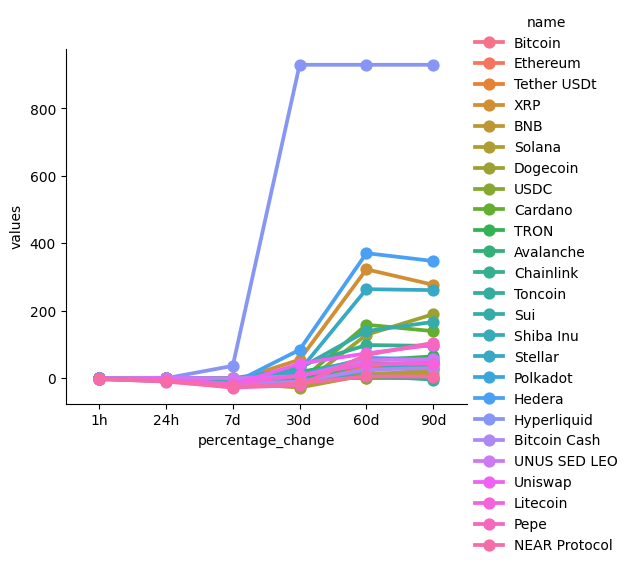

In [30]:
sns.catplot(x='percentage_change',y='values',hue='name',data=df7,kind='point')

In [35]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name=='Bitcoin'")
df10


,name,quote.USD.price,timestamp
0,Bitcoin,96183.61271,2024-12-22 00:27:04.546723
25,Bitcoin,96243.79237,2024-12-22 00:30:31.540654
40,Bitcoin,96243.79237,2024-12-22 00:30:31.828713
55,Bitcoin,96243.79237,2024-12-22 00:30:32.114291
70,Bitcoin,96243.79237,2024-12-22 00:30:32.419738
85,Bitcoin,96243.79237,2024-12-22 00:30:32.725927
100,Bitcoin,96243.79237,2024-12-22 00:30:33.066566
115,Bitcoin,96243.79237,2024-12-22 00:30:33.358541
130,Bitcoin,96243.79237,2024-12-22 00:30:33.646978
145,Bitcoin,96243.79237,2024-12-22 00:30:33.945077


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

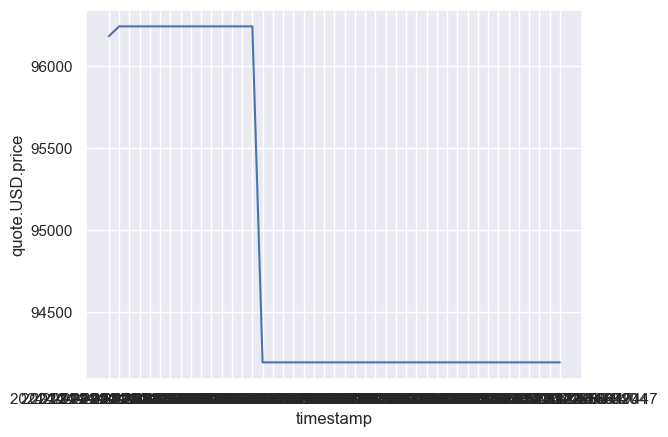

In [38]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)